In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder,PowerTransformer
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score,precision_score, recall_score,f1_score,roc_auc_score,RocCurveDisplay,roc_curve,precision_recall_curve,confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier

import scipy
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [2]:
plt.rcParams['figure.figsize']=[15,6]

In [3]:
df=pd.read_csv('car_insurance.csv')
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.050000,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600000,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.020000,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600000,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.020000,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600000,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.110000,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.800000,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.110000,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.000000,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
def data_preprocessor(df):

    #Clean max_torque and max_power cols
    df["max_torque_Nm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    df["max_torque_rpm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
    
    df["max_power_bhp"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    df["max_power_rpm"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    #Drop original cols
    df.drop(["max_torque","max_power"],axis=1,inplace=True)

In [6]:
data_preprocessor(df)

In [7]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,ID00001,0.515874,0.050000,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600000,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.000000,3500.000000,40.360000,6000.000000
1,ID00002,0.672619,0.020000,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600000,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.000000,3500.000000,40.360000,6000.000000
2,ID00003,0.841110,0.020000,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600000,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,60.000000,3500.000000,40.360000,6000.000000
3,ID00004,0.900277,0.110000,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.800000,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,113.000000,4400.000000,88.500000,6000.000000
4,ID00005,0.596403,0.110000,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.000000,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,91.000000,4250.000000,67.060000,5500.000000


In [8]:
df.drop(['policy_id','make','model'],axis=1,inplace=True)

In [9]:

df['airbags']=df['airbags'].astype('object')
# df['displacement']=df['displacement'].astype('object')
df['cylinder']=df['cylinder'].astype('object')
df['gear_box']=df['gear_box'].astype('object')
# df['turning_radius']=df['turning_radius'].astype('object')
# df['length']=df['length'].astype('object')
# df['width']=df['width'].astype('object')
# df['height']=df['height'].astype('object')
# df['gross_weight']=df['gross_weight'].astype('object')
df['ncap_rating']=df['ncap_rating'].astype('object')
df['is_claim']=df['is_claim'].astype('object')

# Univariate Analysis

In [10]:
cat=df.select_dtypes(include=object).columns

In [11]:
cat

Index(['area_cluster', 'segment', 'fuel_type', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

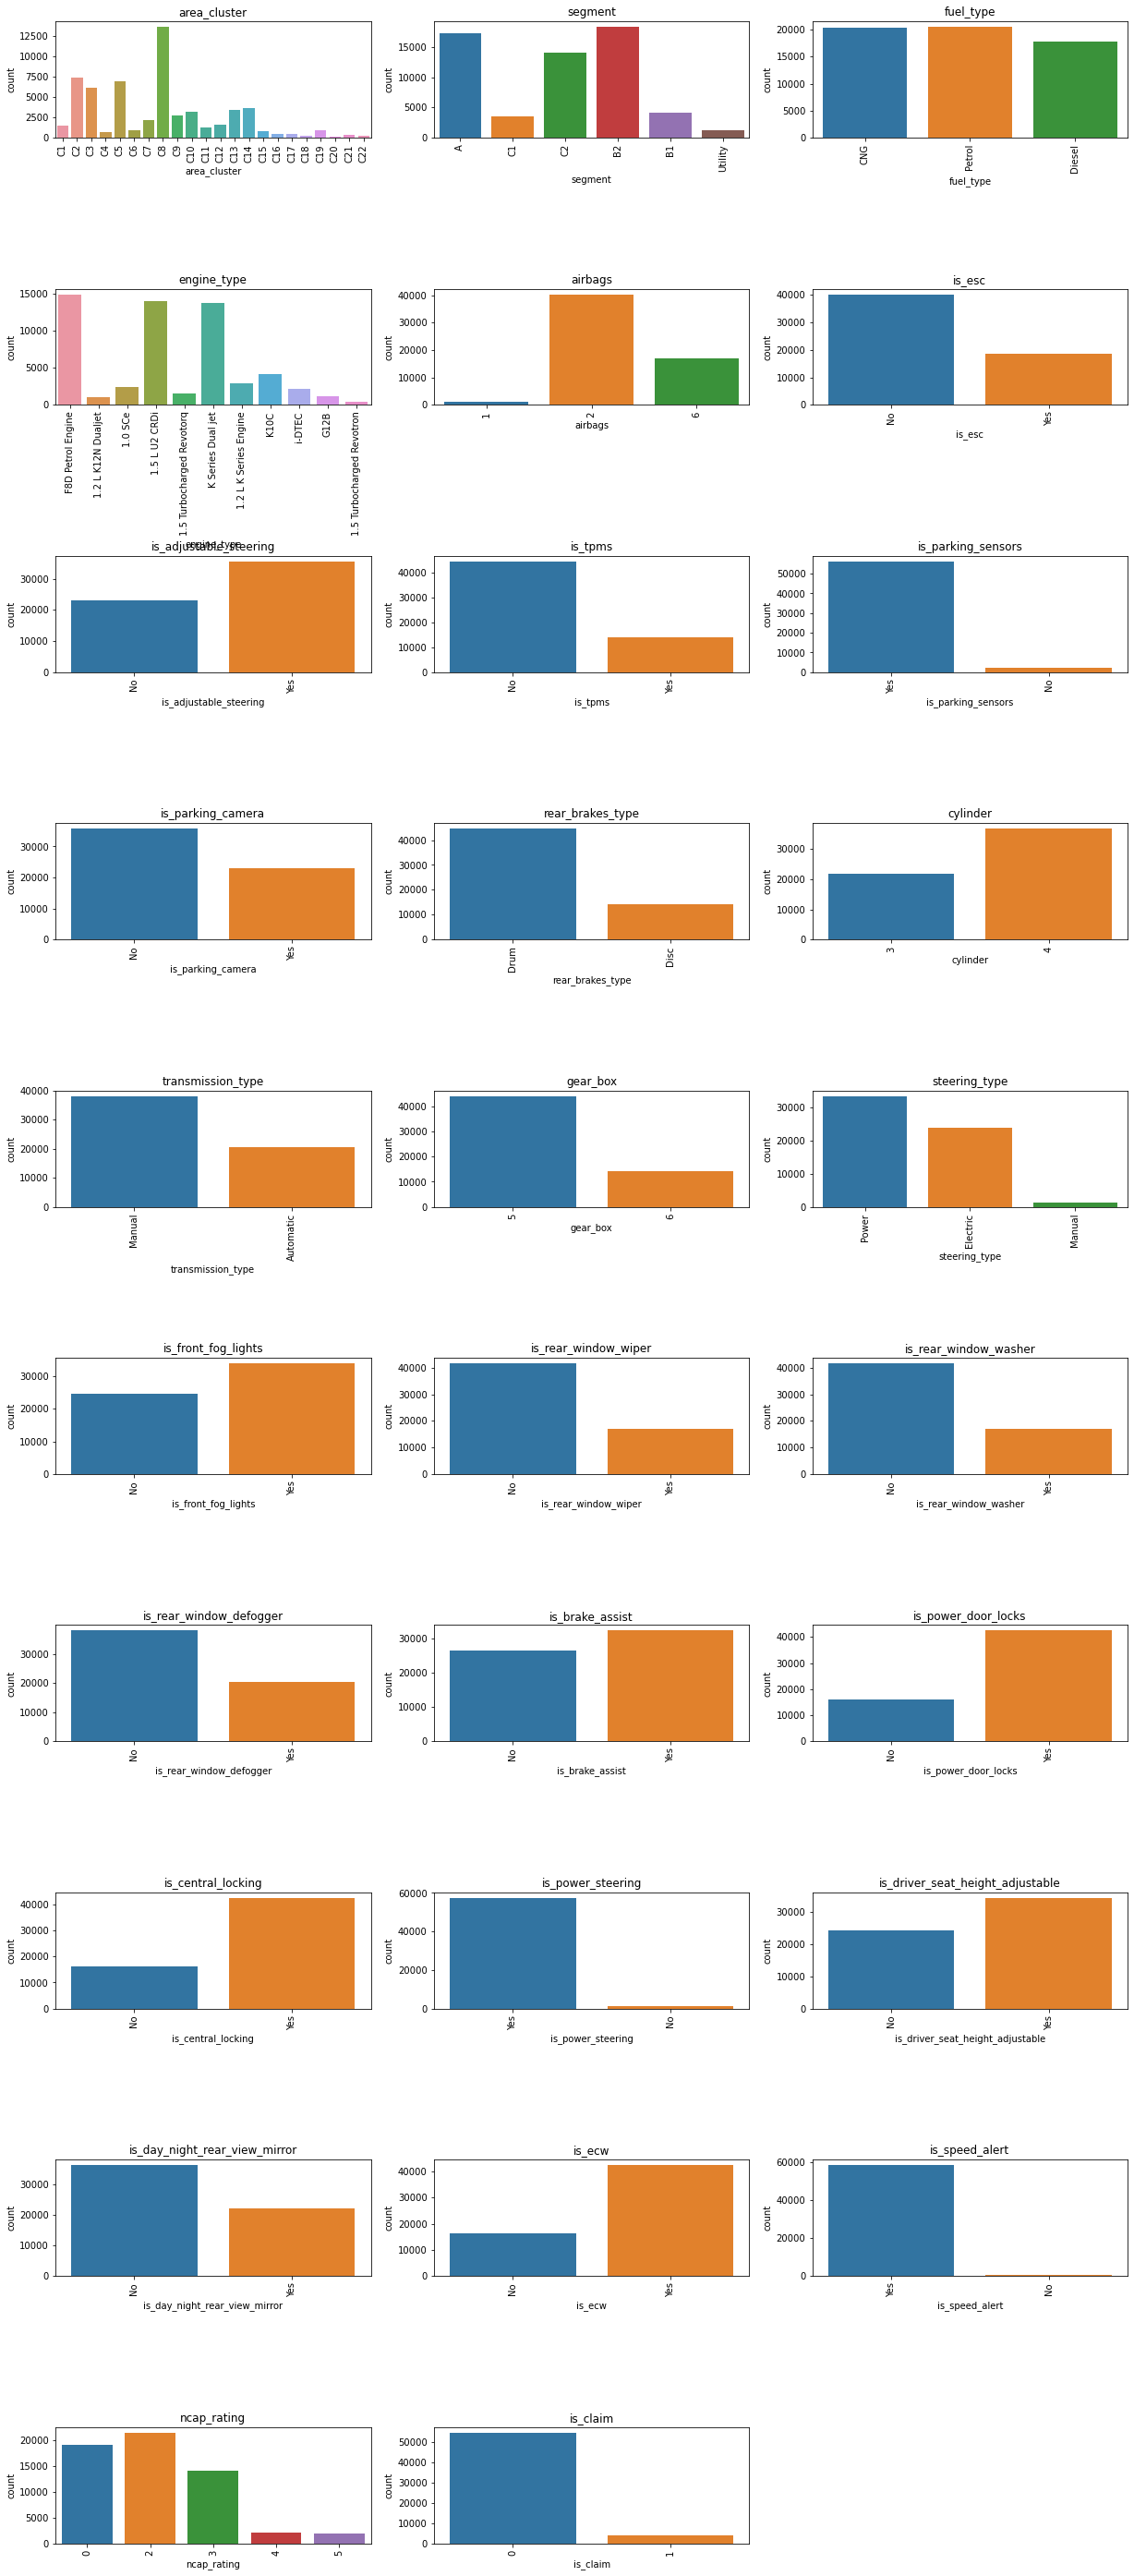

In [12]:
row = 14
col=3
iterator=1
for i in  cat:
    plt.subplots_adjust(left=None, bottom=1, right=1.2, top=10, wspace=None, hspace=1.3)
    plt.subplot(row,col,iterator)
    sns.countplot(df.loc[:,i])
    plt.title(i)
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
    

In [13]:
num_col=df.select_dtypes(include=np.number).columns
num_col

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'displacement', 'turning_radius', 'length',
       'width', 'height', 'gross_weight', 'max_torque_Nm', 'max_torque_rpm',
       'max_power_bhp', 'max_power_rpm'],
      dtype='object')

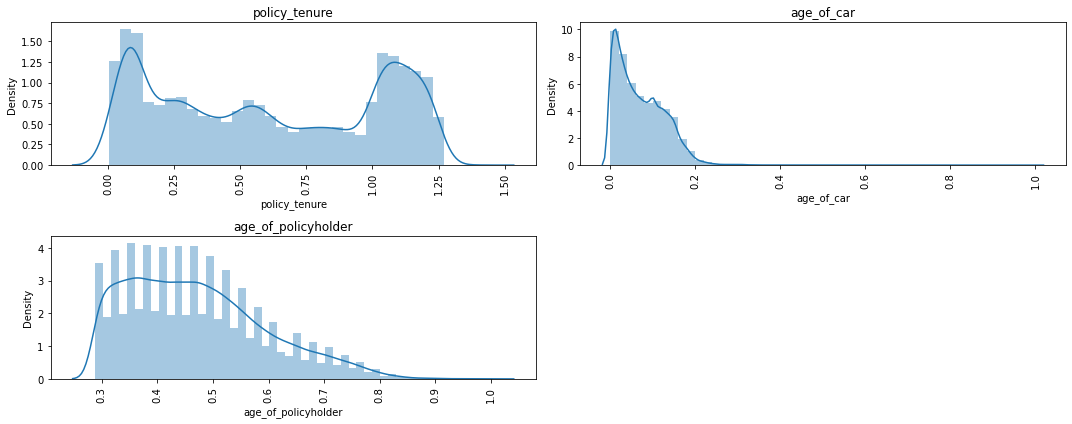

In [14]:
n=['policy_tenure', 'age_of_car', 'age_of_policyholder']
rows=2
columns=2
iterator=1

for i in n:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df[i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

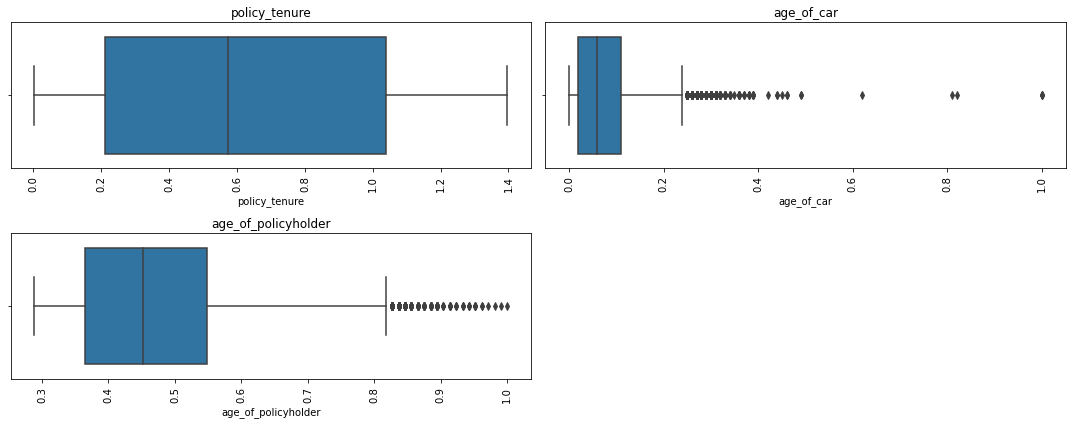

In [15]:
n=['policy_tenure', 'age_of_car', 'age_of_policyholder']
rows=2
columns=2
iterator=1

for i in n:
    plt.subplot(rows,columns,iterator)
    sns.boxplot(df[i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

## Bivariate Analysis

In [16]:
lls=['area_cluster', 'population_density', 'segment',
       'fuel_type', 'engine_type', 'airbags','rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight','ncap_rating']

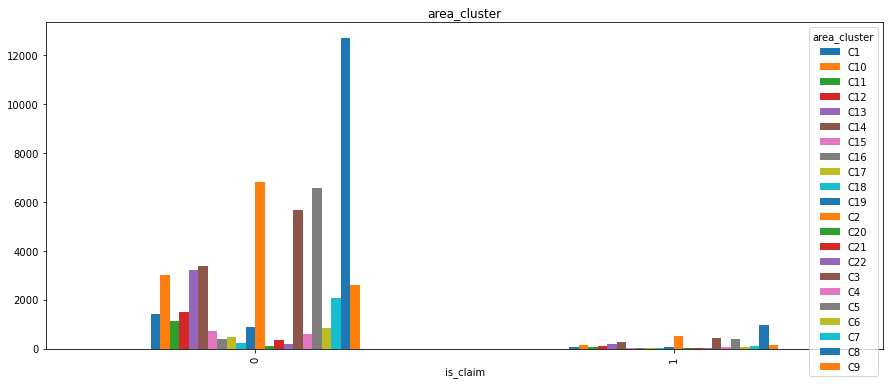

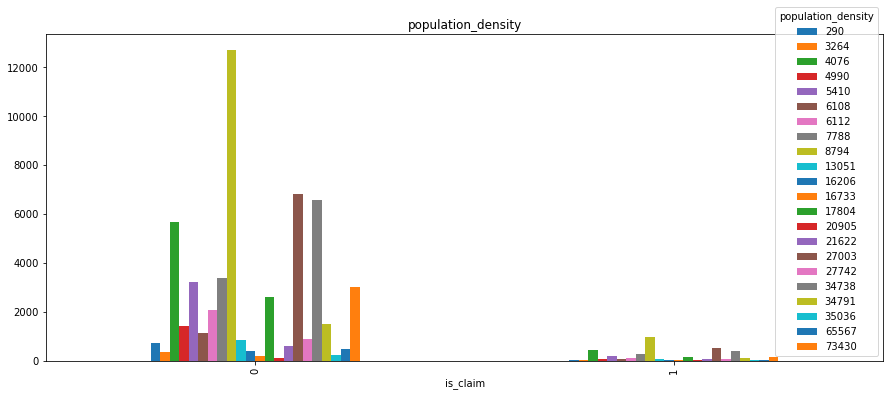

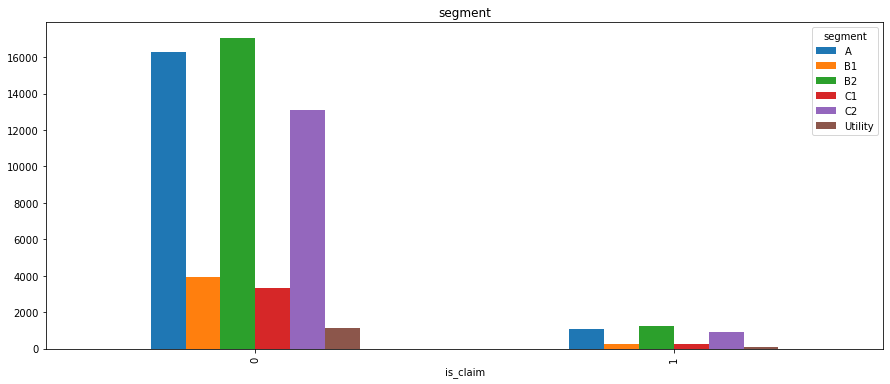

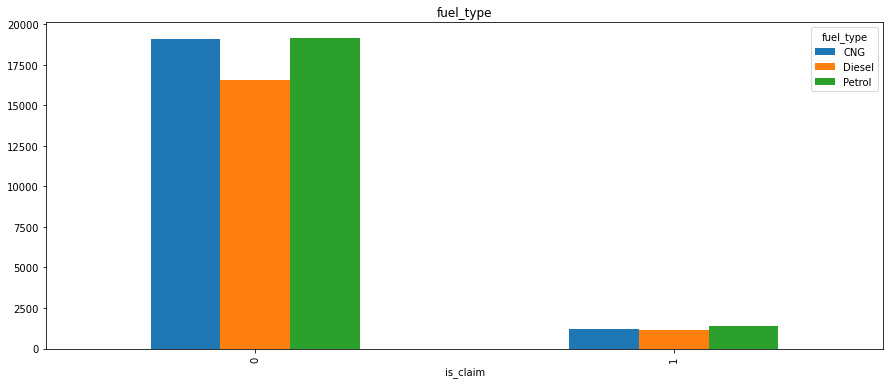

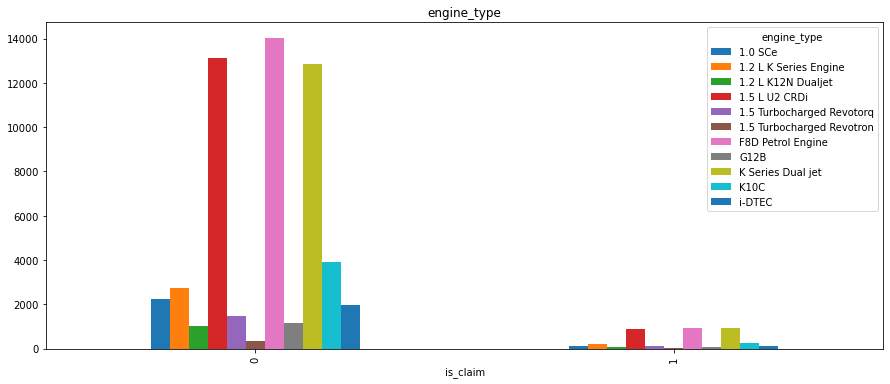

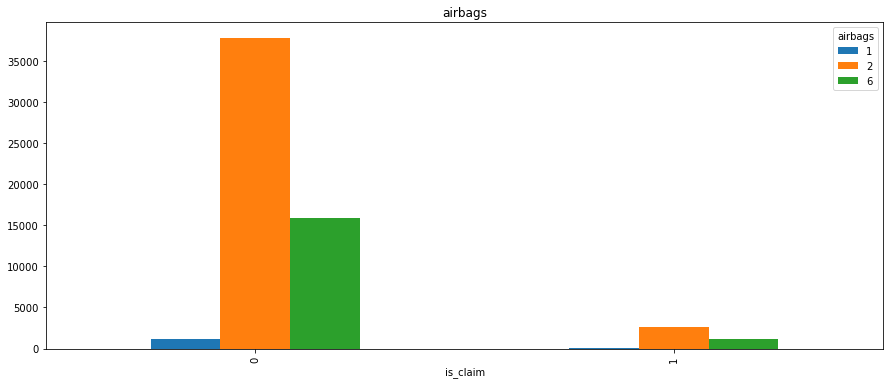

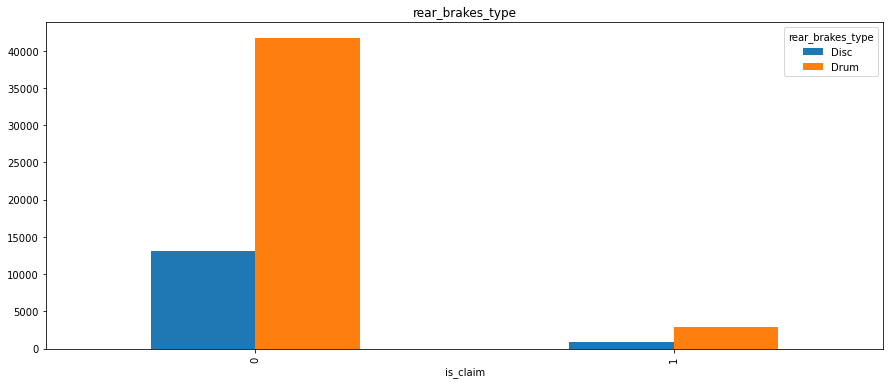

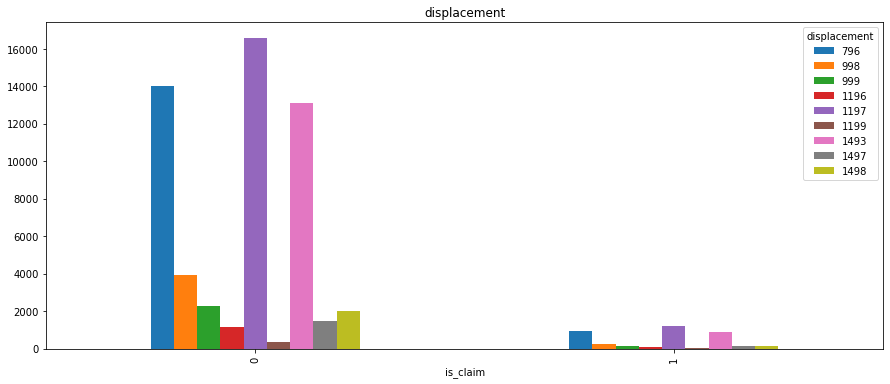

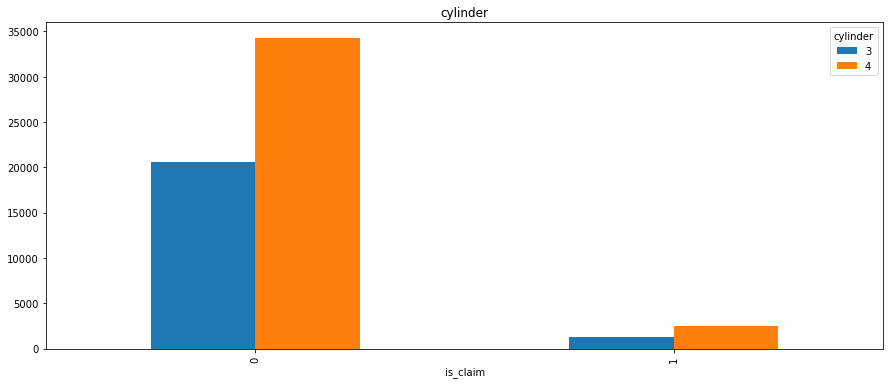

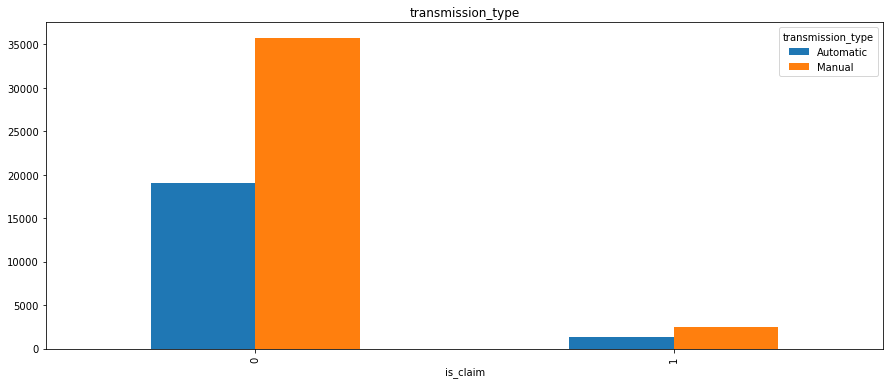

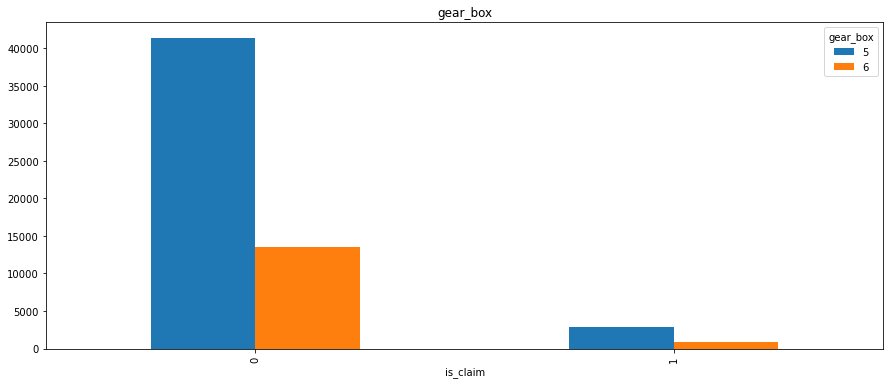

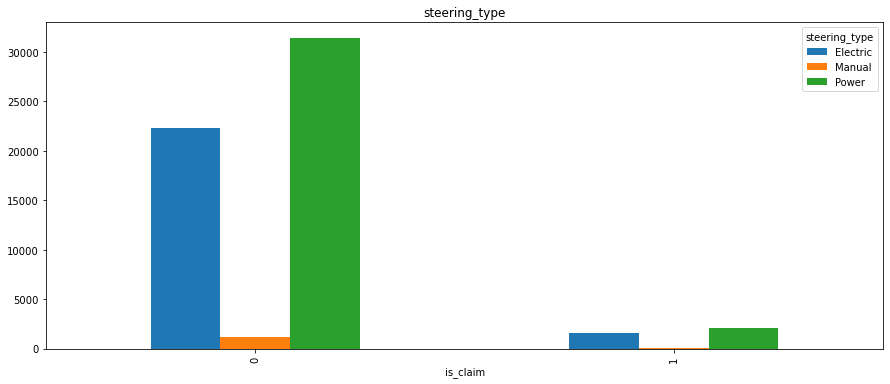

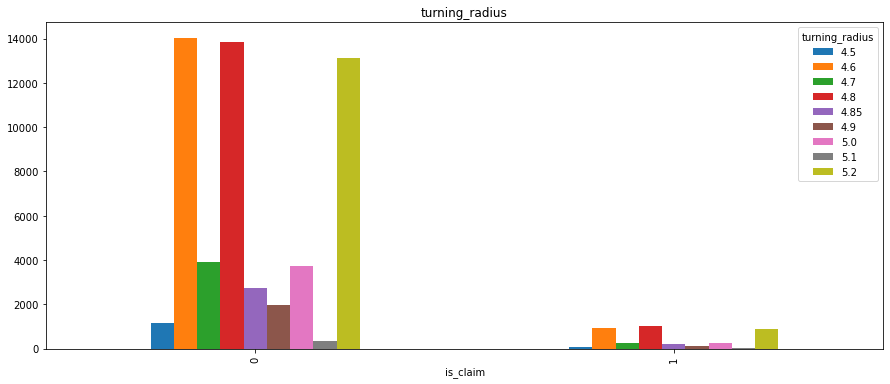

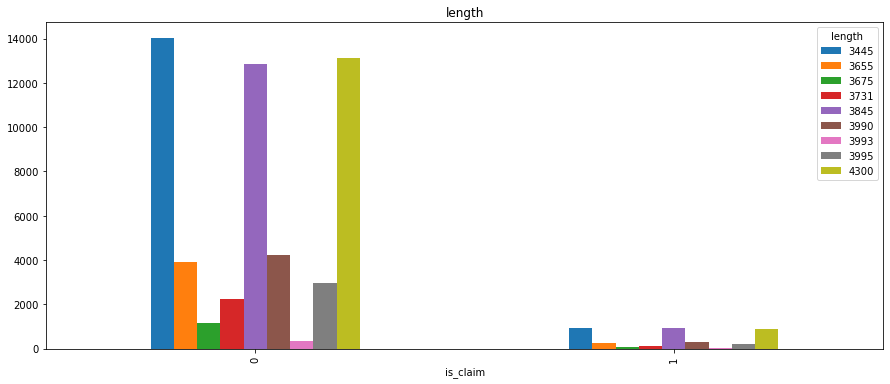

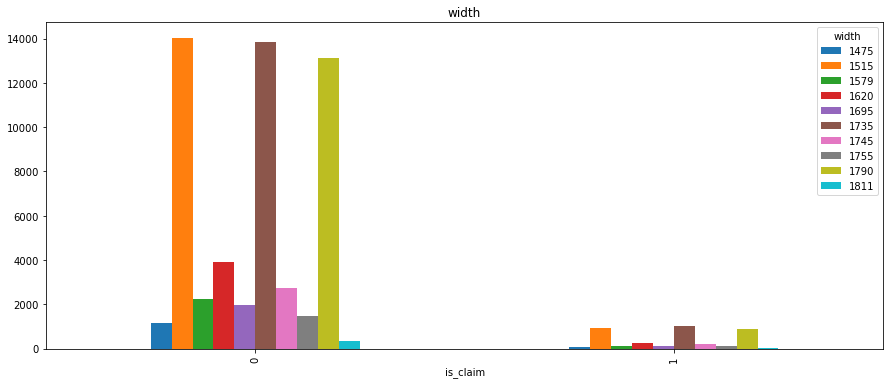

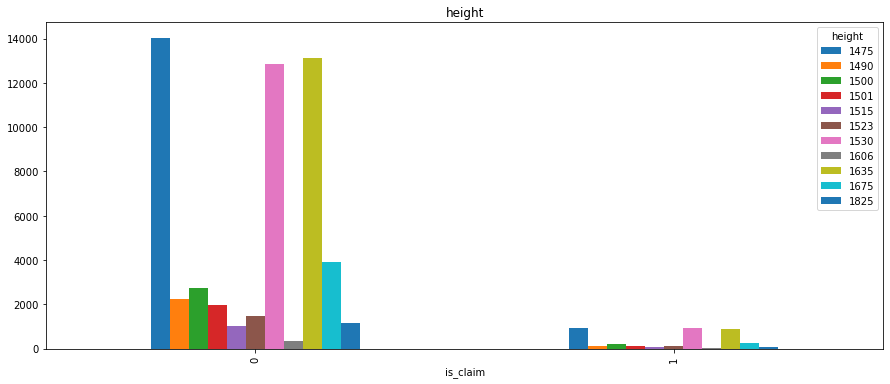

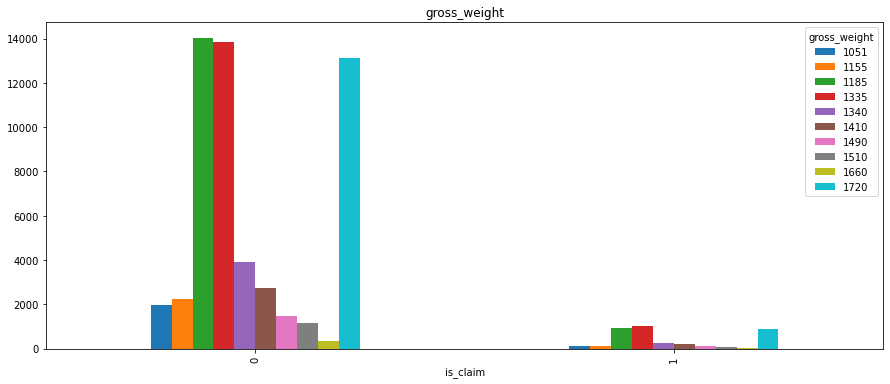

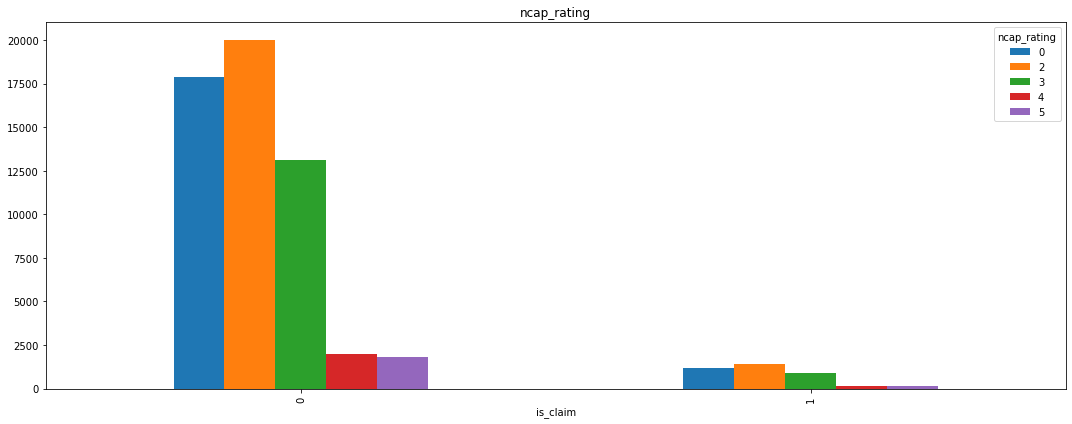

In [17]:
# row=12
# col=2
# iterator=1
for i in  lls:
#     plt.subplots_adjust(left=None, bottom=1, right=None, top=10, wspace=None, hspace=1.3)
#     plt.subplot(row,col,iterator)
    pd.crosstab(df.is_claim,df[i]).plot(kind='bar')
    plt.title(i)
#     iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<AxesSubplot:>

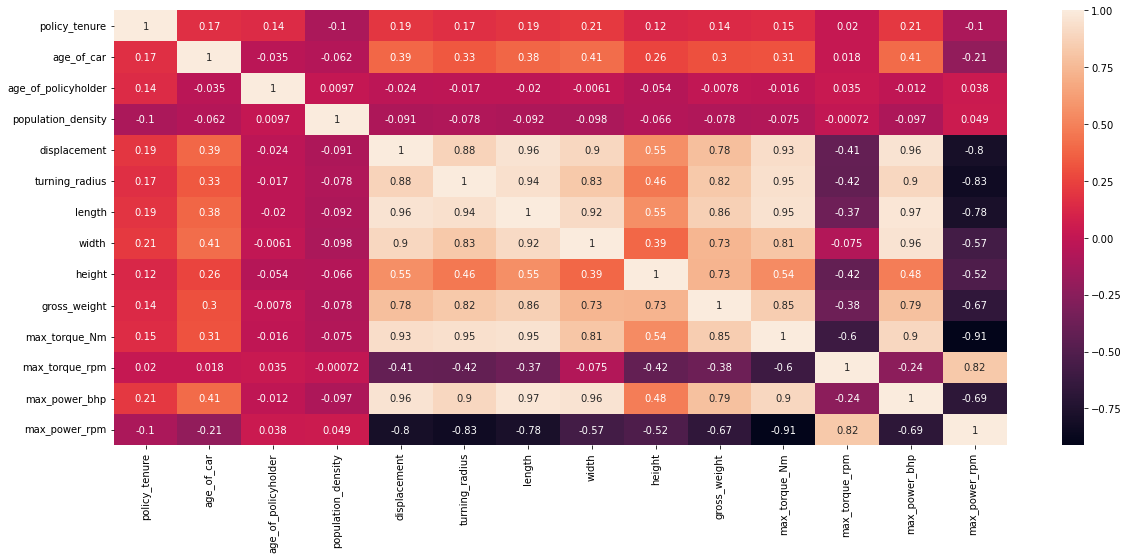

In [18]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

In [19]:
ss=StandardScaler()

In [20]:
df.loc[:,['policy_tenure',
       'population_density', 'displacement', 'turning_radius', 'length',
       'width', 'height', 'gross_weight','max_torque_Nm','max_torque_rpm','max_power_bhp','max_power_rpm']]=ss.fit_transform(pd.DataFrame(df.loc[:,['policy_tenure',
       'population_density', 'displacement', 'turning_radius', 'length',
       'width', 'height', 'gross_weight','max_torque_Nm','max_torque_rpm','max_power_bhp','max_power_rpm' ]]))

In [21]:
df.age_of_car.skew()

1.0940812262542075

<AxesSubplot:xlabel='age_of_car', ylabel='Density'>

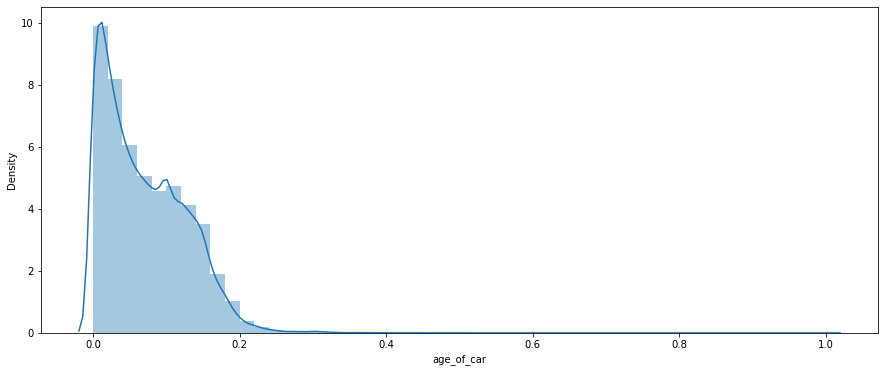

In [22]:
sns.distplot(df.age_of_car)

In [23]:
df.age_of_policyholder.skew()

0.6400493147434646

<AxesSubplot:xlabel='age_of_policyholder', ylabel='Density'>

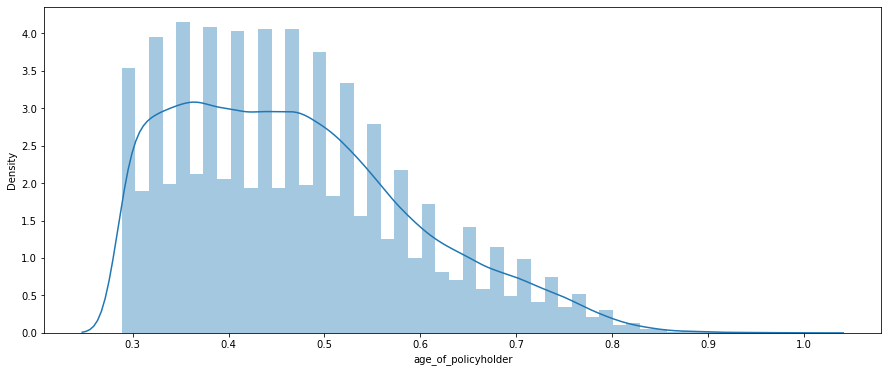

In [24]:
sns.distplot(df.age_of_policyholder)

In [25]:
pt=PowerTransformer(method='yeo-johnson')

In [26]:
df.loc[:,['age_of_car','age_of_policyholder']]=pt.fit_transform(pd.DataFrame(df.loc[:,['age_of_car','age_of_policyholder']]))

In [27]:
df.age_of_car.skew()

0.12448809341883195

<AxesSubplot:xlabel='age_of_car', ylabel='Density'>

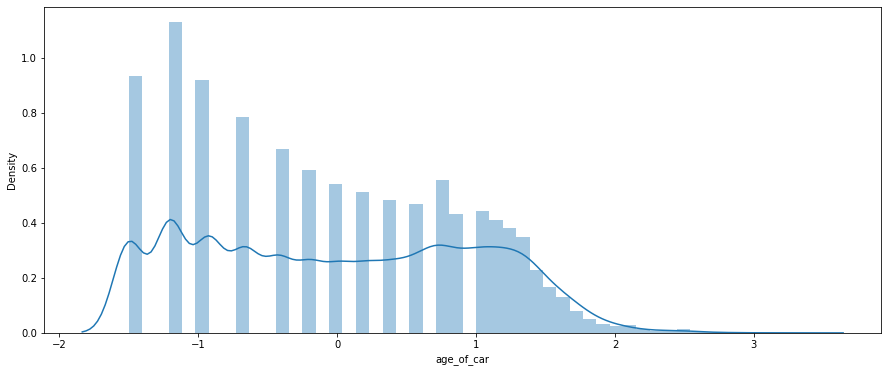

In [28]:
sns.distplot(df.age_of_car)

In [29]:
df.age_of_policyholder.skew()

0.06434844532848479

<AxesSubplot:xlabel='age_of_policyholder', ylabel='Density'>

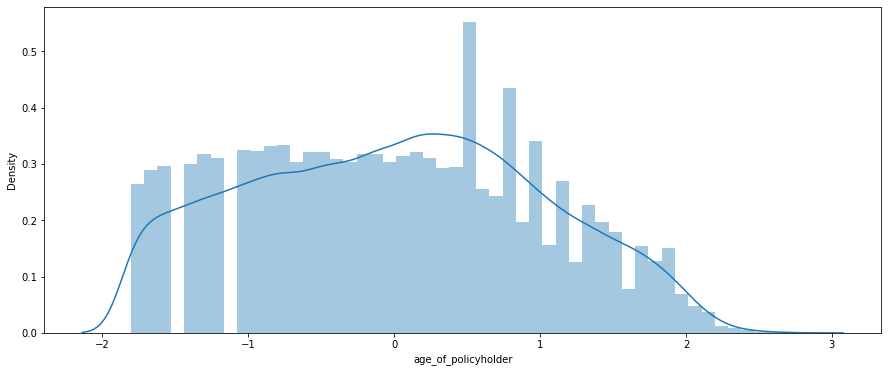

In [30]:
sns.distplot(df.age_of_policyholder)

In [31]:
cluster_freq=df['area_cluster'].value_counts(normalize=True).to_dict()
df['area_cluster']=df['area_cluster'].map(cluster_freq)

In [32]:
engine_freq=df['engine_type'].value_counts(normalize=True).to_dict()
df['engine_type']=df['engine_type'].map(engine_freq)

<AxesSubplot:>

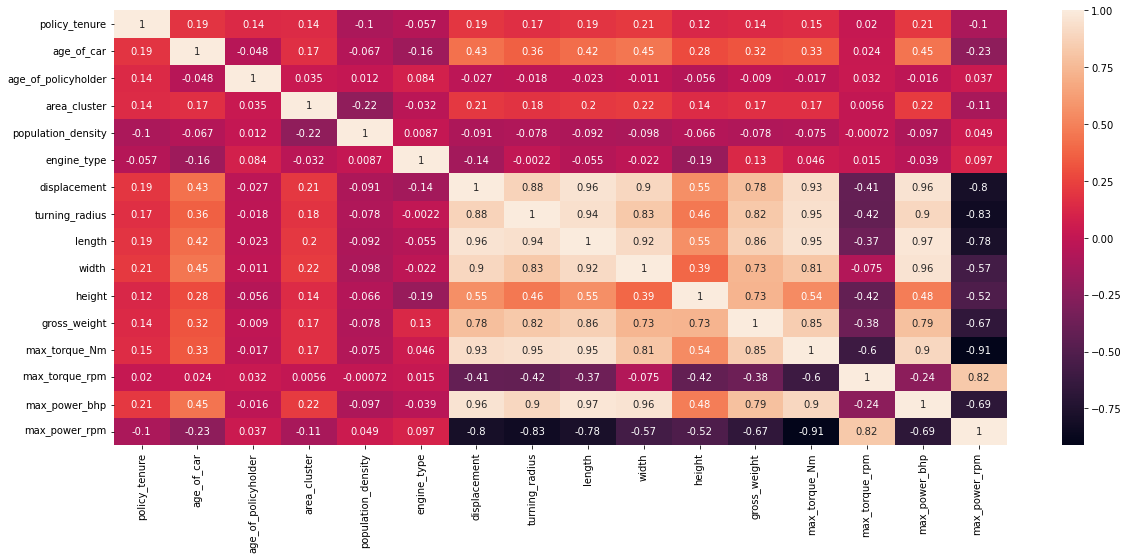

In [33]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

In [34]:
df.head(1)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,segment,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,-0.230283,-0.200500,1.354890,0.025055,-0.783513,A,CNG,0.255120,2,No,No,No,Yes,No,Drum,-1.375713,3,Manual,5,Power,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0,-1.017838,-0.045700,-1.394156,0.755743


In [35]:
# making copy of our dataset df as df_copy based on this we will drop the columns from our main dataframe df

In [36]:
# encoding:

In [37]:
cat=df.select_dtypes(include=object).columns
cat

Index(['segment', 'fuel_type', 'airbags', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [38]:
df1=pd.get_dummies(data=df,columns=['segment', 'fuel_type', 'airbags', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'cylinder', 'transmission_type', 'gear_box',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],drop_first=True)

In [39]:
df1.head(2)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,engine_type,displacement,turning_radius,length,width,height,gross_weight,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,fuel_type_Diesel,fuel_type_Petrol,airbags_2,airbags_6,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,cylinder_4,transmission_type_Manual,gear_box_6,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,ncap_rating_2,ncap_rating_3,ncap_rating_4,ncap_rating_5
0,-0.230283,-0.200500,1.354890,0.025055,-0.783513,0.255120,-1.375713,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0.148188,-0.923772,-0.748659,0.125307,0.462975,0.255120,-1.375713,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [40]:
df1['is_claim']=df1['is_claim'].astype('int')

In [41]:
df1.dtypes

policy_tenure                           float64
age_of_car                              float64
age_of_policyholder                     float64
area_cluster                            float64
population_density                      float64
engine_type                             float64
displacement                            float64
turning_radius                          float64
length                                  float64
width                                   float64
height                                  float64
gross_weight                            float64
is_claim                                  int32
max_torque_Nm                           float64
max_torque_rpm                          float64
max_power_bhp                           float64
max_power_rpm                           float64
segment_B1                                uint8
segment_B2                                uint8
segment_C1                                uint8
segment_C2                              

In [42]:
df1.shape

(58592, 53)

In [43]:
x=df1.drop('is_claim',axis=1)
y=df1['is_claim']

In [44]:
y.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE

smt =  SMOTE(random_state=12,sampling_strategy=0.30)

x, y =  smt.fit_resample(x,y)

x.shape, y.shape

((71297, 52), (71297,))

### mutual_info_classif()

## Feature selection

In [46]:
mutual_info=mutual_info_classif(x,y)
mutual_info

array([1.95264953e-02, 2.09281822e-01, 2.78745663e-01, 1.81245956e-01,
       1.83207318e-01, 0.00000000e+00, 2.03435389e-03, 5.11904278e-03,
       2.62917015e-03, 9.61823894e-04, 2.13668061e-04, 3.41862641e-03,
       3.91480702e-03, 3.41816579e-03, 1.70846754e-03, 6.46172341e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.54928092e-03,
       0.00000000e+00, 1.94151062e-03, 1.45070926e-03, 5.46817392e-03,
       0.00000000e+00, 2.56067486e-03, 2.53101905e-03, 1.62081235e-03,
       7.67119277e-03, 2.64609794e-03, 8.43066286e-03, 3.12029883e-03,
       5.81657205e-03, 4.32377343e-04, 1.72139057e-03, 4.43702443e-03,
       5.63897024e-03, 3.83382479e-03, 2.73093622e-03, 2.34793681e-03,
       4.35889145e-03, 6.71421167e-03, 3.07435827e-03, 1.03635946e-02,
       4.93067922e-03, 8.52364470e-04, 5.12278430e-03, 1.37021333e-02,
       1.64780888e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [47]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x.columns
pd.DataFrame(mutual_info.sort_values(ascending=False),columns=['Mutual_info']).head(20)

,Mutual_info
age_of_policyholder,0.278746
age_of_car,0.209282
population_density,0.183207
area_cluster,0.181246
policy_tenure,0.019526
is_speed_alert_Yes,0.013702
is_power_steering_Yes,0.010364
rear_brakes_type_Drum,0.008431
is_parking_sensors_Yes,0.007671
is_power_door_locks_Yes,0.006714


In [48]:
# higher the mutual info more impactful the feature is

In [49]:
#### or we can use mutual info using select k best we will choose best 15 features

In [50]:
sel_feature=SelectKBest(score_func=mutual_info_classif,  k=20).fit(x,y)

In [51]:
sel_bool=sel_feature.get_support()
sel_bool

array([ True,  True,  True,  True,  True, False, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False,  True, False,  True,  True,  True, False, False,  True,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False])

In [52]:
x_selected=x[x.columns[sel_bool]]
x_selected.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,turning_radius,height,max_torque_rpm,airbags_2,is_adjustable_steering_Yes,is_parking_sensors_Yes,rear_brakes_type_Drum,cylinder_4,transmission_type_Manual,steering_type_Power,is_brake_assist_Yes,is_power_door_locks_Yes,is_power_steering_Yes,is_ecw_Yes,is_speed_alert_Yes
0,-0.230283,-0.200500,1.354890,0.025055,-0.783513,-1.108893,-0.983846,-0.045700,1,0,1,1,0,1,1,0,0,1,0,1
1,0.148188,-0.923772,-0.748659,0.125307,0.462975,-1.108893,-0.983846,-0.045700,1,0,1,1,0,1,1,0,0,1,0,1
2,0.555022,-0.923772,-0.646150,0.104127,-0.835268,-1.108893,-0.983846,-0.045700,1,0,1,1,0,1,1,0,0,1,0,1
3,0.697883,0.862825,-0.171140,0.011350,0.158275,-0.231926,-0.481470,1.194047,1,1,1,1,1,0,0,1,1,1,1,1
4,-0.035840,0.862825,1.300866,0.119112,0.900969,0.645040,-0.795455,0.987423,1,0,0,1,0,0,0,0,1,1,1,1


In [53]:
x_selected.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'turning_radius', 'height', 'max_torque_rpm',
       'airbags_2', 'is_adjustable_steering_Yes', 'is_parking_sensors_Yes',
       'rear_brakes_type_Drum', 'cylinder_4', 'transmission_type_Manual',
       'steering_type_Power', 'is_brake_assist_Yes', 'is_power_door_locks_Yes',
       'is_power_steering_Yes', 'is_ecw_Yes', 'is_speed_alert_Yes'],
      dtype='object')

In [54]:
x.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'engine_type', 'displacement', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'max_torque_Nm',
       'max_torque_rpm', 'max_power_bhp', 'max_power_rpm', 'segment_B1',
       'segment_B2', 'segment_C1', 'segment_C2', 'segment_Utility',
       'fuel_type_Diesel', 'fuel_type_Petrol', 'airbags_2', 'airbags_6',
       'is_esc_Yes', 'is_adjustable_steering_Yes', 'is_tpms_Yes',
       'is_parking_sensors_Yes', 'is_parking_camera_Yes',
       'rear_brakes_type_Drum', 'cylinder_4', 'transmission_type_Manual',
       'gear_box_6', 'steering_type_Manual', 'steering_type_Power',
       'is_front_fog_lights_Yes', 'is_rear_window_wiper_Yes',
       'is_rear_window_washer_Yes', 'is_rear_window_defogger_Yes',
       'is_brake_assist_Yes', 'is_power_door_locks_Yes',
       'is_central_locking_Yes', 'is_power_steering_Yes',
       'is_driver_seat_height_adjustable_Yes',
     

In [55]:
x.shape


(71297, 52)

In [56]:
numc=['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'displacement', 'turning_radius', 'length',
       'width', 'height', 'gross_weight','max_torque_Nm','max_torque_rpm','max_power_bhp','max_power_rpm']
for col in numc:
    x1=df1.loc[(df1.is_claim==0),col]
    x2=df1.loc[(df1.is_claim==1),col]
    _,pval=scipy.stats.ttest_ind(x1,x2)
    print(col,pval)
   

policy_tenure 3.0181155800813767e-81
age_of_car 2.246308039868693e-11
age_of_policyholder 7.947294140806103e-08
population_density 1.6259324287866628e-05
displacement 0.06310215766251895
turning_radius 0.5096346505221433
length 0.11594199374360997
width 0.016050284839034968
height 0.6242737534929995
gross_weight 0.34585778706366954
max_torque_Nm 0.298615425072782
max_torque_rpm 0.24721488433919553
max_power_bhp 0.06242825494755498
max_power_rpm 0.9815945949310484


## P_value less than 0.05 in ttest_ind:

#### policy_tenure: 3.0181155800813767e-81
#### age_of_car :2.246308039868693e-11
#### age_of_policyholder: 7.947294140806103e-08
#### population_density: 1.6259324287866628e-05
#### width: 0.016050284839034968

In [57]:
# p_val=[]
# for col in num_lt.columns:
#     _,p=scipy.stats.ttest_ind(num_lt[col],y)
#     p_val.append(p)

In [58]:
# p_val

In [59]:
# p_val=pd.Series(p_val)
# p_val.index=num_lt.columns
# p_val.sort_values(ascending=True)

### Chi square

In [60]:
test_cols=x.loc[:,['area_cluster','engine_type','segment_B1',
       'segment_B2', 'segment_C1', 'segment_C2', 'segment_Utility',
       'fuel_type_Diesel', 'fuel_type_Petrol', 'airbags_2', 'airbags_6',
       'is_esc_Yes', 'is_adjustable_steering_Yes', 'is_tpms_Yes',
       'is_parking_sensors_Yes', 'is_parking_camera_Yes',
       'rear_brakes_type_Drum', 'cylinder_4', 'transmission_type_Manual',
       'gear_box_6', 'steering_type_Manual', 'steering_type_Power',
       'is_front_fog_lights_Yes', 'is_rear_window_wiper_Yes',
       'is_rear_window_washer_Yes', 'is_rear_window_defogger_Yes',
       'is_brake_assist_Yes', 'is_power_door_locks_Yes',
       'is_central_locking_Yes', 'is_power_steering_Yes',
       'is_driver_seat_height_adjustable_Yes',
       'is_day_night_rear_view_mirror_Yes', 'is_ecw_Yes', 'is_speed_alert_Yes',
       'ncap_rating_2', 'ncap_rating_3', 'ncap_rating_4', 'ncap_rating_5']]

In [61]:
f_p_values=chi2(test_cols,y)
f_p_values

(array([5.55336972e+00, 2.30691361e-04, 7.73089662e+00, 2.24297925e+01,
        3.33587722e+00, 2.13968499e-01, 1.19132836e+00, 8.45357679e-01,
        8.43415204e+00, 1.85214483e-02, 6.33086224e-03, 2.48413171e-01,
        1.62139060e+01, 2.13968499e-01, 4.53244891e-01, 6.85302574e-02,
        6.70903476e-02, 1.41746821e+01, 2.38325367e-02, 9.48986508e-01,
        1.19132836e+00, 1.15243712e+01, 1.18830753e+01, 6.33086224e-03,
        6.33086224e-03, 7.01830170e-01, 8.44462095e+00, 3.07913918e+00,
        3.07913918e+00, 2.48012174e-02, 9.59035138e+00, 1.25892881e+01,
        3.07913918e+00, 6.57751417e-02, 2.59769469e+00, 2.13968499e-01,
        1.28546258e+00, 1.99217320e+00]),
 array([1.84451436e-02, 9.87881775e-01, 5.42837861e-03, 2.17966639e-06,
        6.77842525e-02, 6.43674558e-01, 2.75061775e-01, 3.57868954e-01,
        3.68238558e-03, 8.91747344e-01, 9.36581868e-01, 6.18194636e-01,
        5.65772780e-05, 6.43674558e-01, 5.00798022e-01, 7.93488866e-01,
        7.95621318e-01

In [62]:
p_chi=pd.Series(f_p_values[1])
p_chi.index=test_cols.columns
p_chi.sort_values(ascending=True)[p_chi.sort_values(ascending=True)<0.05].index

Index(['segment_B2', 'is_adjustable_steering_Yes', 'cylinder_4',
       'is_day_night_rear_view_mirror_Yes', 'is_front_fog_lights_Yes',
       'steering_type_Power', 'is_driver_seat_height_adjustable_Yes',
       'is_brake_assist_Yes', 'fuel_type_Petrol', 'segment_B1',
       'area_cluster'],
      dtype='object')

<AxesSubplot:>

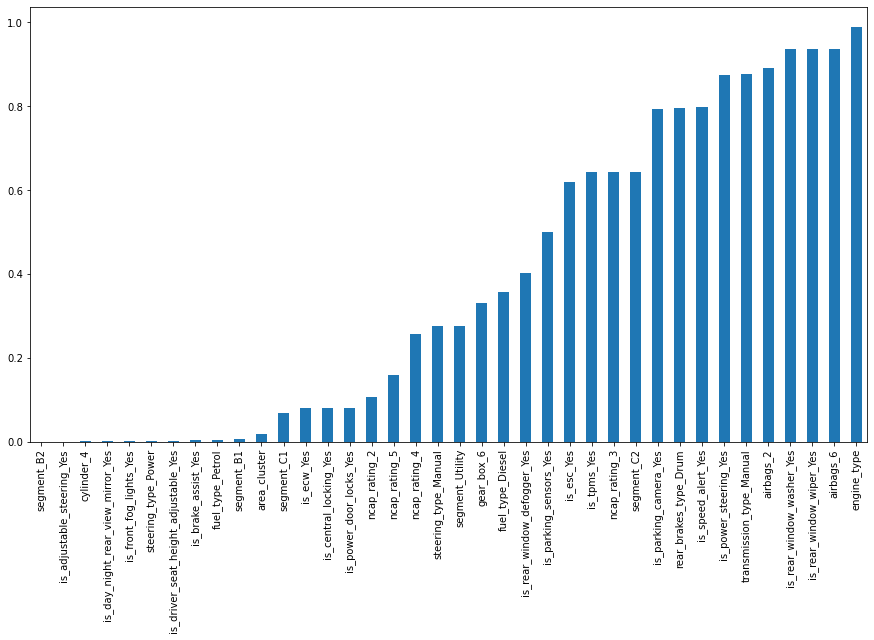

In [63]:
plt.figure(figsize=(15,8))
p_chi.sort_values(ascending=True).plot(kind='bar')

In [64]:
x_stat=x.loc[:,['segment_B2', 'is_adjustable_steering_Yes', 'cylinder_4',
       'is_day_night_rear_view_mirror_Yes', 'is_front_fog_lights_Yes',
       'steering_type_Power', 'is_driver_seat_height_adjustable_Yes',
       'is_brake_assist_Yes', 'fuel_type_Petrol', 'segment_B1',
       'area_cluster','policy_tenure', 'age_of_car','age_of_policyholder','population_density','width']]

In [65]:
asd=['segment_B2', 'is_adjustable_steering_Yes', 'cylinder_4',
       'is_day_night_rear_view_mirror_Yes', 'is_front_fog_lights_Yes',
       'steering_type_Power', 'is_driver_seat_height_adjustable_Yes',
       'is_brake_assist_Yes', 'fuel_type_Petrol', 'segment_B1',
       'area_cluster','policy_tenure', 'age_of_car','age_of_policyholder','population_density','width']

In [66]:
ssads=['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'width', 'airbags_2',
       'is_adjustable_steering_Yes', 'is_tpms_Yes', 'is_parking_sensors_Yes',
       'rear_brakes_type_Drum', 'transmission_type_Manual',
       'steering_type_Power', 'is_brake_assist_Yes', 'is_power_door_locks_Yes',
       'is_central_locking_Yes', 'is_power_steering_Yes',
       'is_driver_seat_height_adjustable_Yes', 'is_ecw_Yes',
       'is_speed_alert_Yes']

In [67]:
matching_Columns=set(ssads).intersection(set(asd))
matching_Columns

{'age_of_car',
 'age_of_policyholder',
 'area_cluster',
 'is_adjustable_steering_Yes',
 'is_brake_assist_Yes',
 'is_driver_seat_height_adjustable_Yes',
 'policy_tenure',
 'population_density',
 'steering_type_Power',
 'width'}

In [68]:
len(ssads)

20

In [69]:
x.shape

(71297, 52)

# we have given x_selected in train_test_split below
# dont forgot to change the columns in it according to stats tests we have performed 

In [70]:
# xc=sm.add_constant(x)

In [71]:
xtrain,xtest,ytrain,ytest=train_test_split(x_stat,y,test_size=0.2,random_state=2)

In [72]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(57037, 16)
(14260, 16)
(57037,)
(14260,)


In [73]:
# xtrain1,xtest1,ytrain1,ytest1=train_test_split(x_selected,y,test_size=0.2,random_state=2)

In [74]:
# print(xtrain1.shape)
# print(xtest1.shape)
# print(ytrain1.shape)
# print(ytest1.shape)

In [75]:
# fit all the models at once

clfs = {
    'Logreg' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Naive Bayes' : GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Ada Boost' : AdaBoostClassifier(),
    'Gradient Boost' : GradientBoostingClassifier(),
    'XgBoost' : XGBClassifier(),
}

models_report = pd.DataFrame(columns=['model name', 'accuracy', 'recall', 'precision', 'roc auc', 'f1 score'])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    print('Fitting model...', clf_name)
    t = {'model name' : clf_name,
        'accuracy' : accuracy_score(ytest,y_pred),
        'recall' : recall_score(ytest,y_pred),
        'precision' : precision_score(ytest,y_pred),
        'roc auc' : roc_auc_score(ytest,y_pred),
        'f1 score' : f1_score(ytest,y_pred),
         'cohen_kappa_score' : cohen_kappa_score(ytest,y_pred)
        }
    models_report = models_report.append(t, ignore_index=True)

models_report = models_report.sort_values(by='f1 score', ascending=False)
models_report

Fitting model... Logreg
Fitting model... KNN
Fitting model... Naive Bayes
Fitting model... Decision Tree
Fitting model... Random Forest
Fitting model... Ada Boost
Fitting model... Gradient Boost
Fitting model... XgBoost


,model name,accuracy,recall,precision,roc auc,f1 score,cohen_kappa_score
7,XgBoost,0.938149,0.728856,0.995752,0.863975,0.841652,0.804358
4,Random Forest,0.914516,0.688122,0.911075,0.834282,0.784057,0.732052
3,Decision Tree,0.862412,0.719527,0.685833,0.811774,0.702276,0.612877
1,KNN,0.827700,0.705846,0.600370,0.784515,0.648850,0.535677
6,Gradient Boost,0.861992,0.388060,1.000000,0.694030,0.559140,0.495525
5,Ada Boost,0.823703,0.277674,0.823801,0.630190,0.415349,0.340341
2,Naive Bayes,0.773072,0.015858,0.418033,0.504715,0.030557,0.014308
0,Logreg,0.774474,0.000000,0.000000,0.500000,0.000000,0.000000


#  LogisticRegression

In [76]:
x.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,engine_type,displacement,turning_radius,length,width,height,gross_weight,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,fuel_type_Diesel,fuel_type_Petrol,airbags_2,airbags_6,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,cylinder_4,transmission_type_Manual,gear_box_6,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,ncap_rating_2,ncap_rating_3,ncap_rating_4,ncap_rating_5
0,-0.230283,-0.200500,1.354890,0.025055,-0.783513,0.255120,-1.375713,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0.148188,-0.923772,-0.748659,0.125307,0.462975,0.255120,-1.375713,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0.555022,-0.923772,-0.646150,0.104127,-0.835268,0.255120,-1.375713,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,-1.017838,-0.045700,-1.394156,0.755743,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0.697883,0.862825,-0.171140,0.011350,0.158275,0.018433,0.130093,-0.231926,0.464026,0.559973,-0.481470,-0.236684,-0.293261,1.194047,0.343811,0.755743,0,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0
4,-0.035840,0.862825,1.300866,0.119112,0.900969,0.040500,-0.613422,0.645040,-0.383610,-0.831789,-0.795455,-1.084057,-0.594029,0.987423,-0.430223,0.210345,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0


In [77]:
y.value_counts()

0    54844
1    16453
Name: is_claim, dtype: int64

In [78]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x_stat,y,test_size=0.2,random_state=20)

In [79]:
ytest1.value_counts()

0    10966
1     3294
Name: is_claim, dtype: int64

In [80]:
lg=LogisticRegression()

In [81]:
model_lg=lg.fit(xtrain1,ytrain1)
model_lg

LogisticRegression()

In [82]:
y_pred=model_lg.predict(xtest1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
xtest1.head()

,segment_B2,is_adjustable_steering_Yes,cylinder_4,is_day_night_rear_view_mirror_Yes,is_front_fog_lights_Yes,steering_type_Power,is_driver_seat_height_adjustable_Yes,is_brake_assist_Yes,fuel_type_Petrol,segment_B1,area_cluster,policy_tenure,age_of_car,age_of_policyholder,population_density,width
28607,1,1,1,1,1,0,1,1,1,0,0.125307,-1.036207,1.368337,1.655718,0.462975,0.559973
3302,0,0,0,0,0,1,0,0,0,0,0.053847,0.813670,-0.923772,0.248163,3.091906,-1.402768
51517,0,1,1,0,1,1,1,1,0,0,0.233035,-0.745512,-1.500461,1.012149,-0.568111,1.050658
28886,1,1,1,1,1,0,1,1,1,0,0.233035,-1.280676,-1.201604,0.248163,-0.568111,0.559973
28507,0,1,1,0,1,1,1,1,0,0,0.058421,0.393338,0.008481,-0.646150,-0.759730,1.050658


In [84]:
acc_score=accuracy_score(ytest1,y_pred)
acc_score

0.7690042075736325

In [85]:
ytest.value_counts()

0    11044
1     3216
Name: is_claim, dtype: int64

In [86]:
cm = confusion_matrix(ytest,y_pred)
cm

array([[11044,     0],
       [ 3216,     0]], dtype=int64)

# DecisionTreeClassifier

In [84]:
tr=DecisionTreeClassifier(random_state=20)

In [85]:
t=tr.fit(xtrain,ytrain)
t

DecisionTreeClassifier(random_state=20)

In [86]:
#Test Report
ytr_pred=t.predict(xtest)

In [87]:
class_report=classification_report(ytest,ytr_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     11044
           1       0.69      0.72      0.70      3216

    accuracy                           0.86     14260
   macro avg       0.80      0.81      0.81     14260
weighted avg       0.87      0.86      0.86     14260



In [88]:
f1_score(ytest,ytr_pred)

0.7041825095057034

In [89]:
# Training Report
tr_train_pred = t.predict(xtrain)
print(classification_report(ytrain, tr_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43800
           1       1.00      1.00      1.00     13237

    accuracy                           1.00     57037
   macro avg       1.00      1.00      1.00     57037
weighted avg       1.00      1.00      1.00     57037



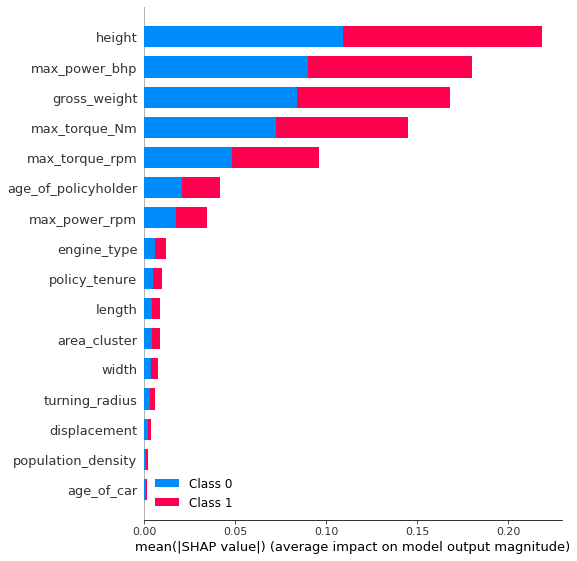

In [90]:
import shap
value=shap.TreeExplainer(t).shap_values(xtest)
shap.summary_plot(value,xtrain,plot_type='bar',feature_names=x.columns)

In [125]:
# fpr,tpr,thresholds = roc_curve(ytest,ytr_pred)

# plt.plot(fpr,tpr)
# plt.grid()
# plt.show()

In [91]:
t_accuracy=accuracy_score(ytest,ytr_pred)
t_accuracy

0.8636044880785414

In [92]:
roc_auc_score(ytest,ytr_pred)

0.8126536707083921

In [128]:
# RocCurveDisplay.from_predictions(ytest,ytr_pred)

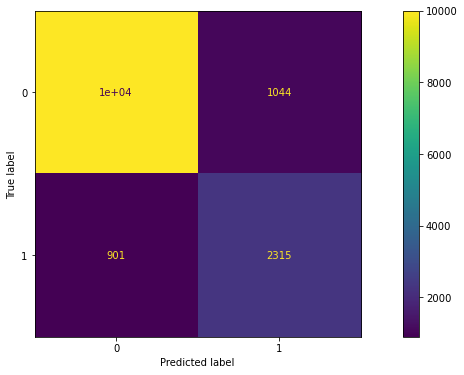

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ytr_pred)

In [82]:
# If we tune the hyperparameters in the decision tree, it helps to avoid/reduce the over-fitting of the tree.

In [108]:
parameters={
     'criterion':['gini','entropy'],
     'max_depth':range(2,30),
     
}
    


In [109]:
cv=GridSearchCV(estimator=tr,param_grid=parameters,cv=20,verbose=1,scoring='roc_auc')

In [110]:
dcv=cv.fit(xtrain,ytrain)

Fitting 20 folds for each of 56 candidates, totalling 1120 fits


In [116]:
dcv.best_params_

{'criterion': 'entropy', 'max_depth': 19}

In [117]:
tr1=DecisionTreeClassifier(criterion= 'entropy',
                         max_depth=19,
                         random_state=20
                         )

In [118]:
model_fit=tr1.fit(xtrain,ytrain)

In [119]:
ytr_pred_hyp=model_fit.predict(xtest)
ytr_pred_hyp

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# from sklearn import tree
# plt.figure(figsize=(35,15))
# tree.plot_tree(tr1,filled=True)

In [120]:
class_report=classification_report(ytest,ytr_pred_hyp)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     11044
           1       0.80      0.55      0.65      3216

    accuracy                           0.87     14260
   macro avg       0.84      0.75      0.78     14260
weighted avg       0.86      0.87      0.86     14260



In [111]:
# Training Report
trhy_train_pred = model_fit.predict(xtrain)
print(classification_report(ytrain, trhy_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     43800
           1       0.95      0.71      0.82     13237

    accuracy                           0.93     57037
   macro avg       0.94      0.85      0.88     57037
weighted avg       0.93      0.93      0.92     57037



In [112]:
trhy_accuracy=accuracy_score(ytest,ytr_pred_hyp)
trhy_accuracy

0.8683730715287518

In [113]:
ytest.value_counts()

0    11044
1     3216
Name: is_claim, dtype: int64

In [114]:
roc_auc_score(ytest,ytr_pred_hyp)

0.766473229650372

### random search cv for decision tree

In [121]:
parameters1={
     'criterion':['gini','entropy'],
     'max_depth':range(2,30),
     'min_samples_split': range(1,25)

}

In [122]:
drscv=RandomizedSearchCV(tr,param_distributions=parameters1,cv=15,scoring='recall',n_iter=50,verbose=1)

In [123]:
drscvmod=drscv.fit(xtrain,ytrain)
drscvmod

Fitting 15 folds for each of 50 candidates, totalling 750 fits


RandomizedSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=20),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 30),
                                        'min_samples_split': range(1, 25)},
                   scoring='recall', verbose=1)

In [125]:
drscvmod.best_params_

{'min_samples_split': 10, 'max_depth': 27, 'criterion': 'entropy'}

In [126]:
drscv1=RandomForestClassifier(criterion= 'entropy',
                         max_depth=27,
                         min_samples_split=10,
                         random_state=20
                         )

In [127]:
drscv_model=drscv1.fit(xtrain,ytrain)

In [129]:
drscv_pred=drscv_model.predict(xtest)
drscv_pred

array([0, 0, 0, ..., 0, 0, 0])

In [130]:
print(classification_report(ytest,drscv_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11044
           1       0.96      0.60      0.74      3216

    accuracy                           0.90     14260
   macro avg       0.93      0.80      0.84     14260
weighted avg       0.91      0.90      0.90     14260



In [132]:
drscv_train_pred = drscv_model.predict(xtrain)
print(classification_report(ytrain, drscv_train_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     43800
           1       0.99      0.77      0.87     13237

    accuracy                           0.95     57037
   macro avg       0.96      0.88      0.92     57037
weighted avg       0.95      0.95      0.94     57037



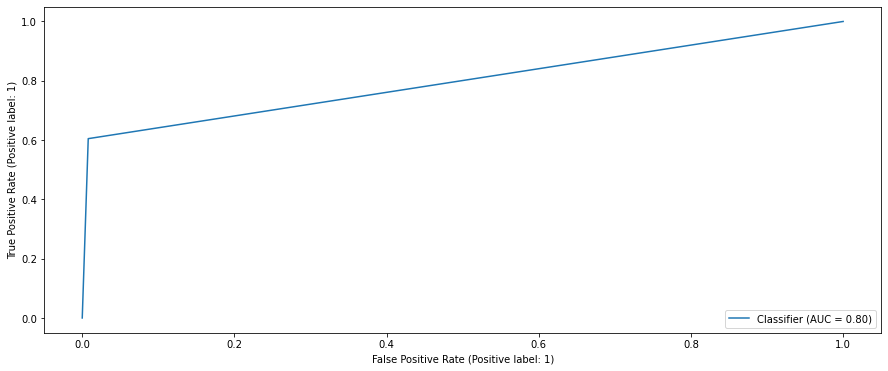

In [133]:
RocCurveDisplay.from_predictions(ytest,drscv_pred)

In [134]:
roc_auc_score(ytest,drscv_pred)

0.7984554883135931

In [135]:
f1_score(ytest,drscv_pred)

0.741234756097561

# RandomForestClassifier

In [87]:
rfc=RandomForestClassifier(random_state=20)

In [88]:
r=rfc.fit(xtrain,ytrain)

In [89]:
rfc_pred=r.predict(xtest)

In [90]:
rfc_acc=accuracy_score(ytest,rfc_pred)
rfc_acc

0.9155680224403927

In [91]:
class_report_rfc=classification_report(ytest,rfc_pred)
print(class_report_rfc)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11044
           1       0.92      0.69      0.79      3216

    accuracy                           0.92     14260
   macro avg       0.92      0.83      0.87     14260
weighted avg       0.92      0.92      0.91     14260



In [92]:
# Training Report
rfc_train_pred = r.predict(xtrain)
print(classification_report(ytrain, rfc_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43800
           1       1.00      1.00      1.00     13237

    accuracy                           1.00     57037
   macro avg       1.00      1.00      1.00     57037
weighted avg       1.00      1.00      1.00     57037



In [93]:
cohen_kappa_score(ytest,rfc_pred)

0.7348054323781223

In [94]:
roc_score_rfc=roc_auc_score(ytest,rfc_pred)
roc_score_rfc

0.8348507823072252

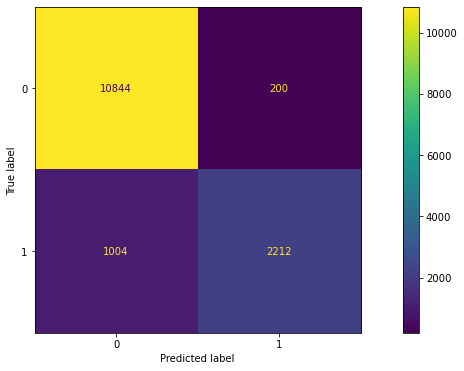

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,rfc_pred)

In [96]:
prandom={
     'n_estimators':range(1,100),
     'criterion':['gini','entropy'],
     'max_depth': range(2,30)     
}

In [97]:
k=KFold(shuffle=True,random_state=2,n_splits=20)

In [98]:
rscv=RandomizedSearchCV(rfc,param_distributions=prandom,cv=k,scoring='roc_auc',n_iter=30,verbose=1)

In [99]:
rscvmod=rscv.fit(xtrain,ytrain)
rscvmod

Fitting 20 folds for each of 30 candidates, totalling 600 fits


RandomizedSearchCV(cv=KFold(n_splits=20, random_state=2, shuffle=True),
                   estimator=RandomForestClassifier(random_state=20), n_iter=30,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 30),
                                        'n_estimators': range(1, 100)},
                   scoring='roc_auc', verbose=1)

In [100]:
rscvmod.best_params_

{'n_estimators': 87, 'max_depth': 27, 'criterion': 'gini'}

In [101]:
rscv1=RandomForestClassifier(criterion= 'gini',
                         max_depth=27,
                         n_estimators=87,
                         random_state=20
                         )

In [102]:
rscv_model=rscv1.fit(xtrain,ytrain)

In [103]:
rscv_pred=rscv_model.predict(xtest)
rscv_pred

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
print(classification_report(ytest,rscv_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11044
           1       0.93      0.67      0.78      3216

    accuracy                           0.91     14260
   macro avg       0.92      0.83      0.86     14260
weighted avg       0.92      0.91      0.91     14260



In [156]:
rscv_train_pred = rscv_model.predict(xtrain)
print(classification_report(ytrain, rscv_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     43800
           1       1.00      0.98      0.99     13237

    accuracy                           1.00     57037
   macro avg       1.00      0.99      0.99     57037
weighted avg       1.00      1.00      1.00     57037



In [157]:
cohen_kappa_score(ytest,rscv_pred)

0.7244662767581895

In [158]:
roc_auc_score(ytest,rscv_pred)

0.825668436610861

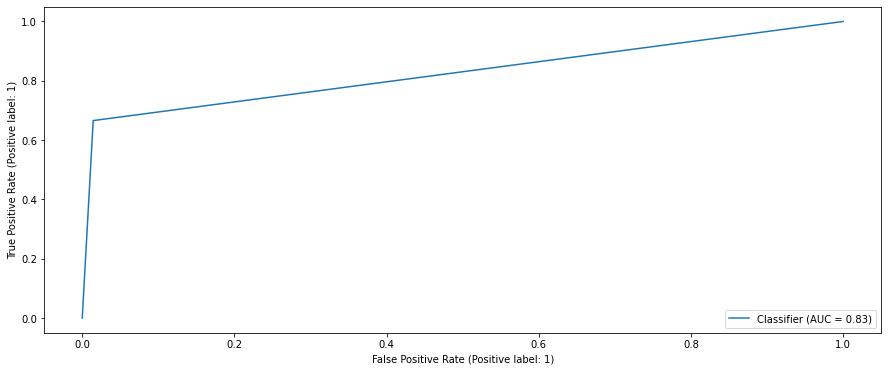

In [159]:
RocCurveDisplay.from_predictions(ytest,rscv_pred)

# XGBClassifier

In [386]:
xg=XGBClassifier()

In [387]:
x1=xg.fit(xtrain,ytrain)


In [388]:
xg_pred=x1.predict(xtest)

In [389]:
xg_acc=accuracy_score(ytest,xg_pred)
xg_acc

0.938148667601683

In [414]:
# Test report
print(classification_report(ytest,xg_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11044
           1       1.00      0.73      0.84      3216

    accuracy                           0.94     14260
   macro avg       0.96      0.86      0.90     14260
weighted avg       0.94      0.94      0.93     14260



In [391]:
# Training Report
xg_train_pred = x1.predict(xtrain)
print(classification_report(ytrain, xg_train_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     43800
           1       1.00      0.74      0.85     13237

    accuracy                           0.94     57037
   macro avg       0.96      0.87      0.91     57037
weighted avg       0.94      0.94      0.94     57037



In [396]:
roc_auc_score(ytest,xg_pred)

0.8639751261800379

In [429]:
kf=KFold(shuffle=True,random_state=2,n_splits=20)

In [430]:
xg_param={
    'n_estimators':range(1,100),
    'learning_rate':[0.0001, 0.001, 0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
    'gamma':range(0,10)
}

In [428]:
xgcv=RandomizedSearchCV(estimator=xg,cv=kf,param_distributions=xg_param,verbose=1,n_iter=50,scoring='roc_auc')

In [431]:
xgcv.fit(xtrain,ytrain)

Fitting 20 folds for each of 50 candidates, totalling 1000 fits


RandomizedSearchCV(cv=KFold(n_splits=20, random_state=2, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=1, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=83, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=50,
                   param_distributions={'gamma': range(0, 10),
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7],
                                        'n_estimators': range(1, 100)},
                   scoring='roc_auc', verbose=1)

In [432]:
xgcv.best_params_

{'n_estimators': 93, 'learning_rate': 0.3, 'gamma': 0}

In [433]:
xg11=XGBClassifier(n_estimators=93,learning_rate=0.3,gamma=0)

In [434]:
xg_=xg11.fit(xtrain,ytrain)

In [435]:
xg11_pred=xg_.predict(xtest)

In [436]:
print(classification_report(ytest,xg11_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11044
           1       1.00      0.72      0.84      3216

    accuracy                           0.94     14260
   macro avg       0.96      0.86      0.90     14260
weighted avg       0.94      0.94      0.93     14260



In [437]:
# Training Report
xg11_train_pred = xg_.predict(xtrain)
print(classification_report(ytrain, xg11_train_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     43800
           1       1.00      0.73      0.85     13237

    accuracy                           0.94     57037
   macro avg       0.96      0.87      0.90     57037
weighted avg       0.94      0.94      0.93     57037



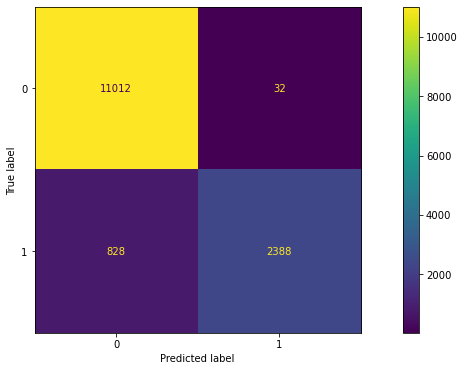

In [422]:
ConfusionMatrixDisplay.from_predictions(ytest,xg11_pred)

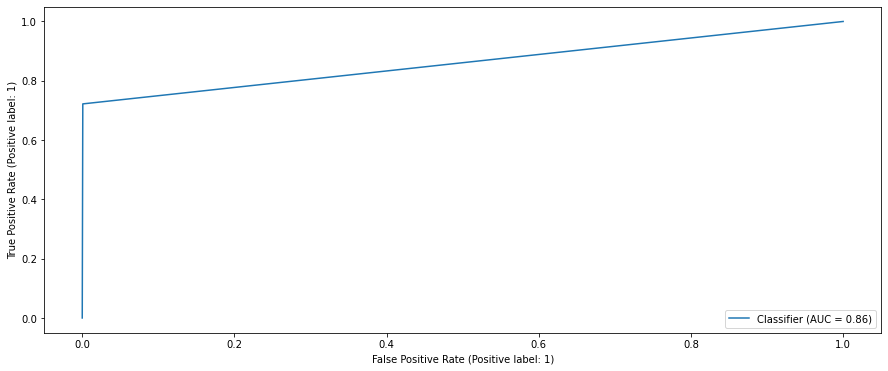

In [438]:
RocCurveDisplay.from_predictions(ytest,xg11_pred)